In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
forders = os.listdir('멜론크롤링')
bugs = os.listdir('벅스크롤링')

print(bugs)

['2019_05_.csv', '2019_06_.csv', '2019_07_.csv', '2019_08_.csv', '2019_09_.csv', '2019_10_.csv', '2019_11_.csv', '2019_12_.csv', '2020_01_.csv', '2020_02_.csv', '2020_03_.csv', '2020_04_.csv', '2020_05_.csv', '2020_06_.csv', '2020_07_.csv', '2020_08_.csv', '2020_09_.csv', '2020_10_.csv', '2020_11_.csv', '2020_12_.csv', '2021_01_.csv', '2021_02_.csv', '2021_03_.csv', '2021_04_.csv', '2021_05_.csv', '2021_06_.csv', '2021_07_.csv', '2021_08_.csv', '2021_09_.csv', '2021_10_.csv', '2021_11_.csv', '2021_12_.csv', '2022_01_.csv']


In [4]:
opp = pd.read_csv('music_chart_2022_2023.csv')
opp = opp[['seqmom','date', 'rank', 'title', 'artist', 'score','ranking changes', 'genre', 'release']]
opp = opp.rename(columns={'seqmom':'Unnamed: 0','date':'날짜', 'rank': '순위', 'title': '곡명', 'artist': '가수', 'ranking changes': '순위 변화', 'genre' :'장르', 'release': '발매일'})
opp

,Unnamed: 0,날짜,순위,곡명,가수,score,순위 변화,장르,발매일
0,2291415,2022.02.28,1,취중고백,김민석,73603820,-,발라드,2021.12.19
1,2280458,2022.02.28,2,ELEVEN,IVE (아이브),59008259,+3,댄스/팝,2021.12.01
2,2250335,2022.02.28,3,사랑은 늘 도망가,임영웅,58776077,+4,발라드,2021.10.11
3,2267913,2022.02.28,4,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)",sokodomo,58090116,-2,랩/힙합,2021.11.13
4,2302482,2022.02.28,5,Step Back,GOT the beat,56555341,+7,댄스/팝,2022.01.03
...,...,...,...,...,...,...,...,...,...
3395,106556,2023.06.30,196,내 손을 잡아,아이유 (IU),8796015,-7,OST,2011.05.25
3396,2229166,2023.06.30,197,고백,멜로망스(Melomance),8689109,-12,발라드,2021.08.29
3397,1166003,2023.06.30,198,첫눈처럼 너에게 가겠다,에일리 (Ailee),8683854,-22,OST,2017.01.07
3398,1137056,2023.06.30,199,That`s What I Like,Bruno Mars,8649536,HOT,팝,2016.11.18


In [5]:
# 1. 장르 여러 개 중에 젤 앞에꺼 뽑기 (만약 젤 앞이 국내드라마...? 뭐 이런거면 그 다음거로 뽑기)
# 1-1. 장르 parsing? 리스트 값만 뽑기, 발매일도!
# 1-2. score int 타입으로 변환
# 2. 장르별 score 합치기 (각 month 안에서)

In [6]:
df_2018 = pd.read_csv('2018_01_2019_04.csv')
df_2018 = df_2018.drop(['Unnamed: 0.1'], axis=1)
df_2018 = df_2018.replace({"장르": '(0/100)'}, '락')

df_2018['장르'].value_counts(ascending = True)
df_2018['날짜'] = df_2018['날짜'].str.split(' ').str.get(0)
df_2018

,Unnamed: 0,날짜,순위,곡명,가수,score,순위 변화,장르,발매일
0,0,2018-01-31,1,그날처럼,장덕철,"215,957,136",55,댄스/팝,2017.11.28
1,1,2018-01-31,2,instagram,DEAN,"164,021,171",26,알앤비/소울,2017.12.26
2,2,2018-01-31,3,비행운,문문 (MoonMoon),"151,749,297",5,인디,2016.11.10
3,3,2018-01-31,4,#첫사랑,볼빨간사춘기,"149,568,914",new,인디,2018.01.10
4,4,2018-01-31,5,선물,멜로망스(Melomance),"140,433,130",1,인디,2017.07.10
...,...,...,...,...,...,...,...,...,...
1995,1995,2019-04-30,196,썸 탈꺼야,볼빨간사춘기,"13,583,848",62,인디,2017.09.28
1996,1996,2019-04-30,197,봄이 좋냐??,10cm,"13,577,736",17,인디,2016.04.01
1997,1997,2019-04-30,198,I`m Not The Only One,Sam Smith,"13,540,864",5,팝,2014.01.01
1998,1998,2019-04-30,199,November Rain,잔나비,"13,460,933",new,인디,2014.10.29


In [7]:
df_bugs = pd.DataFrame()

for i in range(0,len(bugs)):
    if bugs[i].split('.')[1] == 'csv':
        file = '벅스크롤링/'+bugs[i]
        df= pd.read_csv(file,encoding='utf-8') 
        df_bugs = pd.concat([df_bugs, df])

df_bugs

,Unnamed: 0,날짜,순위,곡명,가수,score,순위 변화,장르,발매일
0,0,2019-05-31 23:59:59,1,주저하는 연인들을 위해,잔나비,"181,816,529",2,"인디,\n락/메탈",2019.03.13
1,1,2019-05-31 23:59:59,2,작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey),방탄소년단,"179,833,803",4,"랩/힙합,\n알앤비/소울",2019.04.12
2,2,2019-05-31 23:59:59,3,사랑에 연습이 있었다면 (Prod. 2soo),임재현,"154,372,885",39,발라드,2018.09.25
3,3,2019-05-31 23:59:59,4,FANCY,TWICE,"140,583,864",43,댄스/팝,2019.04.22
4,4,2019-05-31 23:59:59,5,Goodbye,박효신,"137,572,435",new,발라드,2019.05.06
...,...,...,...,...,...,...,...,...,...
195,195,2022-01-31 23:59:59,196,살짝 설렜어 (Nonstop),오마이걸 (OH MY GIRL),"7,401,438",26,댄스/팝,2020.04.27
196,196,2022-01-31 23:59:59,197,내게 오는 길,성시경,"7,390,415",HOT,"댄스/팝,\n발라드",2001.04
197,197,2022-01-31 23:59:59,198,라라라,SG 워너비,"7,297,033",13,"댄스/팝,\n발라드",2008.04.24
198,198,2022-01-31 23:59:59,199,우산 (Feat. 윤하),에픽하이 (EPIK HIGH),"7,293,054",5,랩/힙합,2008.04.17


In [8]:
df_bugs['장르'].value_counts(ascending = True)

인디,\n락/메탈,\nOST            1
2020.03.18                 1
일렉트로닉,\n댄스/팝               1
댄스/팝,\n랩/힙합,\n발라드          1
랩/힙합,\n발라드,\n알앤비/소울        1
                        ... 
발라드,\nOST                377
랩/힙합                     618
팝                        625
댄스/팝                     929
발라드                     1318
Name: 장르, Length: 70, dtype: int64

In [9]:
df_bugs['장르'].nunique()

70

In [10]:
df_bugs['장르'] = df_bugs['장르'].apply(lambda x : x.split(',')[0] if ',' in x else x)

In [11]:
df_bugs['장르'].value_counts(ascending = True)

2020.03.18       1
2019.04.25       2
듣기               3
(0/100)          4
OST              6
2020.06.20       7
인디               8
락/메탈            14
2019.03.21      16
일렉트로닉           16
포크/어쿠스틱         20
캐롤              21
일렉트로닉           28
락/메탈            28
락               31
OST             36
캐롤              40
알앤비/소울          45
락               53
포크/어쿠스틱         80
랩/힙합           125
팝              138
성인가요           201
알앤비/소울         320
발라드            411
인디             577
랩/힙합           618
팝              625
댄스/팝           879
댄스/팝           929
발라드           1318
Name: 장르, dtype: int64

In [12]:
df_bugs[df_bugs['장르'] == '2019.04.25']
df_bugs[df_bugs['장르'] == '2020.03.18']
df_bugs[df_bugs['장르'] == '(0/100)']
df_bugs[df_bugs['장르'] == '2019.03.21']

,Unnamed: 0,날짜,순위,곡명,가수,score,순위 변화,장르,발매일
191,191,2019-05-31 23:59:59,192,On My Way,"Alan Walker, Sabrina Carpenter, Farruko","13,807,280",85,2019.03.21,싱글
157,157,2019-06-30 23:59:59,158,On My Way,"Alan Walker, Sabrina Carpenter, Farruko","15,414,905",34,2019.03.21,싱글
155,155,2019-07-31 23:59:59,156,On My Way,"Alan Walker, Sabrina Carpenter, Farruko","17,173,716",2,2019.03.21,싱글
143,143,2019-08-31 23:59:59,144,On My Way,"Alan Walker, Sabrina Carpenter, Farruko","17,622,102",12,2019.03.21,싱글
144,144,2019-09-30 23:59:59,145,On My Way,"Alan Walker, Sabrina Carpenter, Farruko","16,546,556",1,2019.03.21,싱글
131,131,2019-10-31 23:59:59,132,On My Way,"Alan Walker, Sabrina Carpenter, Farruko","17,451,162",13,2019.03.21,싱글
145,145,2019-11-30 23:59:59,146,On My Way,"Alan Walker, Sabrina Carpenter, Farruko","15,095,825",14,2019.03.21,싱글
170,170,2019-12-31 23:59:59,171,On My Way,"Alan Walker, Sabrina Carpenter, Farruko","13,380,140",25,2019.03.21,싱글
152,152,2020-01-31 23:59:59,153,On My Way,"Alan Walker, Sabrina Carpenter, Farruko","13,503,757",18,2019.03.21,싱글
159,159,2020-02-29 23:59:59,160,On My Way,"Alan Walker, Sabrina Carpenter, Farruko","12,164,838",7,2019.03.21,싱글


In [13]:
df_bugs[df_bugs['장르']== '2020.06.20']

,Unnamed: 0,날짜,순위,곡명,가수,score,순위 변화,장르,발매일
42,42,2021-07-31 23:59:59,43,OHAYO MY NIGHT,"디핵 (D-Hack), PATEKO(파테코)","36,933,491",new,2020.06.20,싱글
10,10,2021-08-31 23:59:59,11,OHAYO MY NIGHT,"디핵 (D-Hack), PATEKO(파테코)","72,765,999",32,2020.06.20,싱글
6,6,2021-09-30 23:59:59,7,OHAYO MY NIGHT,"디핵 (D-Hack), PATEKO(파테코)","79,209,120",4,2020.06.20,싱글
8,8,2021-10-31 23:59:59,9,OHAYO MY NIGHT,"디핵 (D-Hack), PATEKO(파테코)","72,893,832",2,2020.06.20,싱글
13,13,2021-11-30 23:59:59,14,OHAYO MY NIGHT,"디핵 (D-Hack), PATEKO(파테코)","55,432,084",5,2020.06.20,싱글
24,24,2021-12-31 23:59:59,25,OHAYO MY NIGHT,"디핵 (D-Hack), PATEKO(파테코)","43,396,949",11,2020.06.20,싱글
27,27,2022-01-31 23:59:59,28,OHAYO MY NIGHT,"디핵 (D-Hack), PATEKO(파테코)","37,517,117",3,2020.06.20,싱글


In [14]:
df_bugs[df_bugs['장르'] == '듣기']

,Unnamed: 0,날짜,순위,곡명,가수,score,순위 변화,장르,발매일
108,108,2021-05-31 23:59:59,109,고래 (Dive Into You),NCT DREAM,"17,646,902",new,듣기,NewJeans
177,177,2021-05-31 23:59:59,178,Diggity,NCT DREAM,"9,605,691",new,듣기,NewJeans
165,165,2021-06-30 23:59:59,166,고래 (Dive Into You),NCT DREAM,"9,605,119",57,듣기,NewJeans


In [15]:
df_bugs['장르'].value_counts(ascending = True)

2020.03.18       1
2019.04.25       2
듣기               3
(0/100)          4
OST              6
2020.06.20       7
인디               8
락/메탈            14
2019.03.21      16
일렉트로닉           16
포크/어쿠스틱         20
캐롤              21
일렉트로닉           28
락/메탈            28
락               31
OST             36
캐롤              40
알앤비/소울          45
락               53
포크/어쿠스틱         80
랩/힙합           125
팝              138
성인가요           201
알앤비/소울         320
발라드            411
인디             577
랩/힙합           618
팝              625
댄스/팝           879
댄스/팝           929
발라드           1318
Name: 장르, dtype: int64

In [16]:
# df_bugs.loc[df['장르'] == '2020.06.20', '장르'] = '랩/힙합'

df_bugs = df_bugs.replace({"장르": '2020.06.20'}, '랩/힙합')
df_bugs = df_bugs.replace({"장르": '2019.04.25'}, '일렉트로닉')
df_bugs = df_bugs.replace({"장르": '2020.03.18'}, '팝')
df_bugs = df_bugs.replace({"장르": '(0/100)'}, '락')
df_bugs = df_bugs.replace({"장르": '2019.03.21'}, '일렉트로닉')
df_bugs = df_bugs.replace({"장르": '듣기'}, '랩/힙합')

In [17]:
df_bugs['장르'] = df_bugs['장르'].apply(lambda x : x.rstrip())
df_bugs['장르'].value_counts(ascending = True)

OST          42
락/메탈         42
캐롤           61
일렉트로닉        62
락            88
포크/어쿠스틱     100
성인가요        201
알앤비/소울      365
인디          585
랩/힙합        753
팝           764
발라드        1729
댄스/팝       1808
Name: 장르, dtype: int64

In [18]:
df_bugs['score'].value_counts(ascending = True)

13,011,070     1
19,839,017     1
20,077,964     1
14,285,297     1
9,859,065      1
              ..
20,144,024     1
17,624,080     1
22,724,639     1
195,985,176    1
30,078,167     1
Name: score, Length: 6600, dtype: int64

In [19]:
df_bugs['score'] = df_bugs['score'].apply(lambda x : x.replace(",", ""))
df_2018['score'] = df_2018['score'].apply(lambda x : x.replace(",", ""))

In [20]:
df_bugs['score'] = df_bugs['score'].astype(float)
df_2018['score'] = df_2018['score'].astype(float)

In [21]:
df_bugs['score']

0      181816529.0
1      179833803.0
2      154372885.0
3      140583864.0
4      137572435.0
          ...     
195      7401438.0
196      7390415.0
197      7297033.0
198      7293054.0
199      7289400.0
Name: score, Length: 6600, dtype: float64

In [22]:
df_bugs['날짜'] = df_bugs['날짜'].str.split(' ').str.get(0)

In [23]:
opp['날짜'] = opp['날짜'].str.replace('.','-')
opp

,Unnamed: 0,날짜,순위,곡명,가수,score,순위 변화,장르,발매일
0,2291415,2022-02-28,1,취중고백,김민석,73603820,-,발라드,2021.12.19
1,2280458,2022-02-28,2,ELEVEN,IVE (아이브),59008259,+3,댄스/팝,2021.12.01
2,2250335,2022-02-28,3,사랑은 늘 도망가,임영웅,58776077,+4,발라드,2021.10.11
3,2267913,2022-02-28,4,"회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)",sokodomo,58090116,-2,랩/힙합,2021.11.13
4,2302482,2022-02-28,5,Step Back,GOT the beat,56555341,+7,댄스/팝,2022.01.03
...,...,...,...,...,...,...,...,...,...
3395,106556,2023-06-30,196,내 손을 잡아,아이유 (IU),8796015,-7,OST,2011.05.25
3396,2229166,2023-06-30,197,고백,멜로망스(Melomance),8689109,-12,발라드,2021.08.29
3397,1166003,2023-06-30,198,첫눈처럼 너에게 가겠다,에일리 (Ailee),8683854,-22,OST,2017.01.07
3398,1137056,2023-06-30,199,That`s What I Like,Bruno Mars,8649536,HOT,팝,2016.11.18


In [24]:
# df_melon['장르'].value_counts(ascending = True)

In [25]:
# df_melon['장르'] = df_melon['장르'].apply(lambda x : x.split(',')[0] if ',' in x else x)

In [26]:
# df_melon['장르'] = df_melon['장르'].apply(lambda x : x.rstrip())
# df_melon['장르'].value_counts(ascending = True)

In [27]:
# df_melon['score'] = df_melon['score'].apply(lambda x : x.replace(",", ""))
# df_melon['score'] = df_melon['score'].astype(float)
# df_melon['score']

In [28]:
data = pd.DataFrame()
df_bugs = pd.concat([df_2018, df_bugs])
data = pd.concat([df_bugs,opp])
data

,Unnamed: 0,날짜,순위,곡명,가수,score,순위 변화,장르,발매일
0,0,2018-01-31,1,그날처럼,장덕철,215957136.0,55,댄스/팝,2017.11.28
1,1,2018-01-31,2,instagram,DEAN,164021171.0,26,알앤비/소울,2017.12.26
2,2,2018-01-31,3,비행운,문문 (MoonMoon),151749297.0,5,인디,2016.11.10
3,3,2018-01-31,4,#첫사랑,볼빨간사춘기,149568914.0,new,인디,2018.01.10
4,4,2018-01-31,5,선물,멜로망스(Melomance),140433130.0,1,인디,2017.07.10
...,...,...,...,...,...,...,...,...,...
3395,106556,2023-06-30,196,내 손을 잡아,아이유 (IU),8796015.0,-7,OST,2011.05.25
3396,2229166,2023-06-30,197,고백,멜로망스(Melomance),8689109.0,-12,발라드,2021.08.29
3397,1166003,2023-06-30,198,첫눈처럼 너에게 가겠다,에일리 (Ailee),8683854.0,-22,OST,2017.01.07
3398,1137056,2023-06-30,199,That`s What I Like,Bruno Mars,8649536.0,HOT,팝,2016.11.18


In [29]:
new = data.iloc[:, [1,5,7]]
new

,날짜,score,장르
0,2018-01-31,215957136.0,댄스/팝
1,2018-01-31,164021171.0,알앤비/소울
2,2018-01-31,151749297.0,인디
3,2018-01-31,149568914.0,인디
4,2018-01-31,140433130.0,인디
...,...,...,...
3395,2023-06-30,8796015.0,OST
3396,2023-06-30,8689109.0,발라드
3397,2023-06-30,8683854.0,OST
3398,2023-06-30,8649536.0,팝


In [30]:
result = new.groupby(['날짜', '장르']).sum()
result.to_csv('장르별_score.csv', encoding='cp949')
result

score
날짜         장르                   
2018-01-31 OST      9.384574e+07
           댄스/팝     2.269774e+09
           락        6.051660e+07
           랩/힙합     3.623970e+08
           발라드      1.623663e+09
...                          ...
2023-06-30 알앤비/소울   2.061284e+08
           인디       2.723547e+08
           일렉트로닉    1.229840e+07
           팝        3.304241e+08
           포크/어쿠스틱  2.134592e+07

[763 rows x 1 columns]

<AxesSubplot:xlabel='날짜,장르'>

C:\Users\hwi23\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hwi23\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hwi23\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hwi23\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hwi23\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hwi23\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50508 missing from c

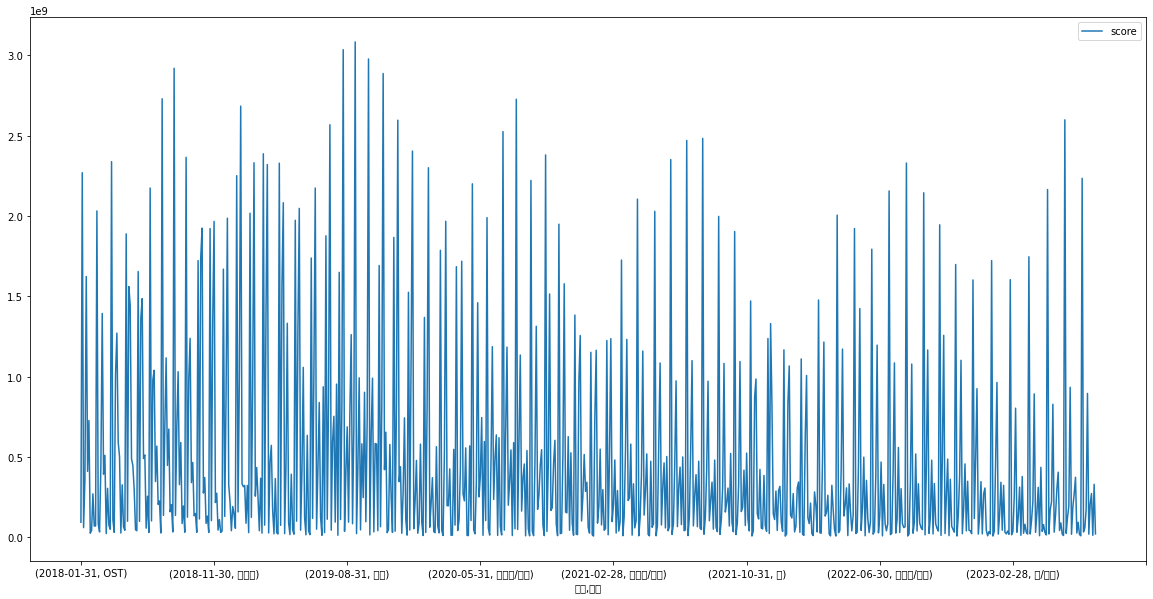

In [31]:
result.plot(figsize = (20, 10))

In [32]:
result.to_csv('genre_score.csv', encoding='cp949')